In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
import pandas as pd

# Initialize the encoder
encoder = OneHotEncoder()

# Load your data
df_new = pd.read_csv(r'C:\professional\ms\shu\dissertation\Output_data\final.csv')

# Fit and transform the 'category_1' column
encoded_categories = encoder.fit_transform(df_new[['category_1']])

# Create a DataFrame with the encoded categories
df_cat = pd.DataFrame(encoded_categories.toarray(), columns=encoder.get_feature_names_out(['category_1']))


In [18]:
# Concatenate the original DataFrame and the one-hot encoded DataFrame
df = pd.concat([df_new, df_cat], axis=1)
df = df.drop(['zip_code','category_1','weighted_average_rating'],axis=1)

In [19]:
df.columns

Index(['Female: Under 20', 'Female: 20-44', 'Female: 44 years and over',
       'Male: Under 20', 'Male: 20-44', 'Male: 44 years and over',
       'Total_Population', 'Household Median Income', 'Asian alone',
       'Black or African American alone', 'Two or more races:', 'White alone',
       'Other races', 'category_1_African', 'category_1_American',
       'category_1_Asian', 'category_1_Australian', 'category_1_Bakery',
       'category_1_Breakfast and Brunch', 'category_1_Canadian',
       'category_1_Coffee and Tea', 'category_1_Desserts',
       'category_1_European', 'category_1_French', 'category_1_Indian',
       'category_1_Italian', 'category_1_Juice and Smoothies',
       'category_1_Latin American', 'category_1_Mediterranean',
       'category_1_Mexican', 'category_1_Middle Eastern', 'category_1_Salads',
       'category_1_Sandwiches', 'category_1_Seafood', 'category_1_Vegetarian'],
      dtype='object')

In [20]:
df

,Female: Under 20,Female: 20-44,Female: 44 years and over,Male: Under 20,Male: 20-44,Male: 44 years and over,Total_Population,Household Median Income,Asian alone,Black or African American alone,...,category_1_Italian,category_1_Juice and Smoothies,category_1_Latin American,category_1_Mediterranean,category_1_Mexican,category_1_Middle Eastern,category_1_Salads,category_1_Sandwiches,category_1_Seafood,category_1_Vegetarian
0,3749.0,6044.0,8840.0,4452.0,5552.0,7505.0,36142.0,29568.0,0.0,3147.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3749.0,6044.0,8840.0,4452.0,5552.0,7505.0,36142.0,29568.0,0.0,3147.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3749.0,6044.0,8840.0,4452.0,5552.0,7505.0,36142.0,29568.0,0.0,3147.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3749.0,6044.0,8840.0,4452.0,5552.0,7505.0,36142.0,29568.0,0.0,3147.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3749.0,6044.0,8840.0,4452.0,5552.0,7505.0,36142.0,29568.0,0.0,3147.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14790,2305.0,2760.0,5341.0,2204.0,2987.0,4895.0,20492.0,56872.0,255.0,173.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14791,2305.0,2760.0,5341.0,2204.0,2987.0,4895.0,20492.0,56872.0,255.0,173.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14792,2305.0,2760.0,5341.0,2204.0,2987.0,4895.0,20492.0,56872.0,255.0,173.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14793,2305.0,2760.0,5341.0,2204.0,2987.0,4895.0,20492.0,56872.0,255.0,173.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
from sklearn.preprocessing import StandardScaler
# Select features for similarity comparison
selected_features = ["Female: Under 20","Female: 20-44",
                     "Female: 44 years and over","Male: Under 20","Male: 20-44",
                     "Male: 44 years and over","Total_Population","Household Median Income",
                     "Asian alone","Black or African American alone","Two or more races:",
                     "White alone","Other races"]

# Standardize the demographic features
scaler = StandardScaler()
df[selected_features] = scaler.fit_transform(df[selected_features])

In [22]:
df

,Female: Under 20,Female: 20-44,Female: 44 years and over,Male: Under 20,Male: 20-44,Male: 44 years and over,Total_Population,Household Median Income,Asian alone,Black or African American alone,...,category_1_Italian,category_1_Juice and Smoothies,category_1_Latin American,category_1_Mediterranean,category_1_Mexican,category_1_Middle Eastern,category_1_Salads,category_1_Sandwiches,category_1_Seafood,category_1_Vegetarian
0,0.047474,0.230525,0.929421,0.255247,0.058693,0.762871,0.421890,-1.572172,-0.666634,-0.051262,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.047474,0.230525,0.929421,0.255247,0.058693,0.762871,0.421890,-1.572172,-0.666634,-0.051262,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.047474,0.230525,0.929421,0.255247,0.058693,0.762871,0.421890,-1.572172,-0.666634,-0.051262,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.047474,0.230525,0.929421,0.255247,0.058693,0.762871,0.421890,-1.572172,-0.666634,-0.051262,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.047474,0.230525,0.929421,0.255247,0.058693,0.762871,0.421890,-1.572172,-0.666634,-0.051262,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14790,-0.540376,-0.754642,-0.137558,-0.621297,-0.704507,-0.135088,-0.521041,-0.761769,-0.587459,-0.594340,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14791,-0.540376,-0.754642,-0.137558,-0.621297,-0.704507,-0.135088,-0.521041,-0.761769,-0.587459,-0.594340,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14792,-0.540376,-0.754642,-0.137558,-0.621297,-0.704507,-0.135088,-0.521041,-0.761769,-0.587459,-0.594340,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14793,-0.540376,-0.754642,-0.137558,-0.621297,-0.704507,-0.135088,-0.521041,-0.761769,-0.587459,-0.594340,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


C:\Users\nikhi\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nikhi\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nikhi\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nikhi\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nikhi\anaconda\lib\site-packages\sklearn\cluster\_k

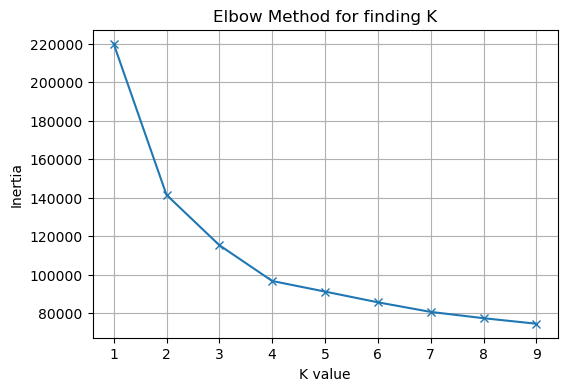

In [77]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create an empty list to store the inertia (within-cluster sum of squares) values
inertia = []

# Fit K-means for each K and calculate inertia
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

# Plot the inertia values to find the 'elbow'
plt.figure(figsize=(6, 4))
plt.plot(range(1, 10), inertia, marker='x', linestyle='-')
plt.xlabel('K value')
plt.ylabel('Inertia')
plt.title('Elbow Method for finding K')
plt.grid(True)
plt.show()


C:\Users\nikhi\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nikhi\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nikhi\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nikhi\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nikhi\anaconda\lib\site-packages\sklearn\cluster\_k

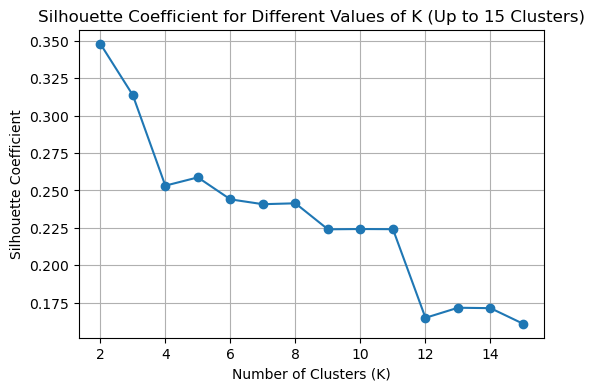

In [83]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Create an empty list to store the Silhouette Coefficient values
silhouette_scores = []

# Fit K-means for each K and calculate the Silhouette Coefficient
for k in range(2, 16): 
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df) 
    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Coefficient values
plt.figure(figsize=(6, 4))
plt.plot(range(2, 16), silhouette_scores, marker='o', linestyle='-')  # Update the x-axis range
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient for Different Values of K (Up to 15 Clusters)')
plt.grid(True)
plt.show()


In [82]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(df)
silhouette_avg = silhouette_score(df, labels)
silhouette_scores.append(silhouette_avg)
print(f"Silhouette Score for K=4: {silhouette_avg}")

C:\Users\nikhi\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for K=4: 0.253182009773356


In [36]:
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(df)
# Adding clusters to df
df['cluster_labels'] = cluster_labels

C:\Users\nikhi\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [37]:
cluster_labels

array([0, 0, 0, ..., 2, 2, 2])

In [52]:
df

,Female: Under 20,Female: 20-44,Female: 44 years and over,Male: Under 20,Male: 20-44,Male: 44 years and over,Total_Population,Household Median Income,Asian alone,Black or African American alone,...,category_1_Juice and Smoothies,category_1_Latin American,category_1_Mediterranean,category_1_Mexican,category_1_Middle Eastern,category_1_Salads,category_1_Sandwiches,category_1_Seafood,category_1_Vegetarian,cluster_labels
0,0.047474,0.230525,0.929421,0.255247,0.058693,0.762871,0.421890,-1.572172,-0.666634,-0.051262,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.047474,0.230525,0.929421,0.255247,0.058693,0.762871,0.421890,-1.572172,-0.666634,-0.051262,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.047474,0.230525,0.929421,0.255247,0.058693,0.762871,0.421890,-1.572172,-0.666634,-0.051262,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.047474,0.230525,0.929421,0.255247,0.058693,0.762871,0.421890,-1.572172,-0.666634,-0.051262,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.047474,0.230525,0.929421,0.255247,0.058693,0.762871,0.421890,-1.572172,-0.666634,-0.051262,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14790,-0.540376,-0.754642,-0.137558,-0.621297,-0.704507,-0.135088,-0.521041,-0.761769,-0.587459,-0.594340,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
14791,-0.540376,-0.754642,-0.137558,-0.621297,-0.704507,-0.135088,-0.521041,-0.761769,-0.587459,-0.594340,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
14792,-0.540376,-0.754642,-0.137558,-0.621297,-0.704507,-0.135088,-0.521041,-0.761769,-0.587459,-0.594340,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
14793,-0.540376,-0.754642,-0.137558,-0.621297,-0.704507,-0.135088,-0.521041,-0.761769,-0.587459,-0.594340,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [124]:
from sklearn.metrics.pairwise import manhattan_distances
print("******Welcome to the cuisine recommendation system!!******\n")
try:
    input_cat = input("Please enter the cuisine you want recommendation for: ")
    # One hot encoded
    input_cat_col = f'category_1_{input_cat}'  
    input_cat_data = df[df[input_cat_col] == 1]
    input_cat_cluster = input_cat_data['cluster_labels'].values[0]

    # Calculate Manhattan distances between the clusters
    cluster_distances = []
    for index, row in df.iterrows():
        if row['cluster_labels'] != input_cat_cluster:
            manhattan_distance = manhattan_distances([row.drop(['cluster_labels']).values],
                [df[df['cluster_labels'] == input_cat_cluster].drop(['cluster_labels'], axis=1).values[0]]
            )
            cluster_distances.append(manhattan_distance)
            
    # Get the category columns within the nearest cluster
    nearest_cluster_cat = [col for col in nearest_cluster_data.columns if col.startswith('category_1_')]

    # Extract the category names that are present in the nearest cluster
    rec_categories = [category.replace('category_1_', '') for category in nearest_cluster_cat if 
                      nearest_cluster_data[category].sum() > 0]

    # Display only the top 10 recommended categories
    top_10 = rec_categories[:10]
    print(f"\nThe most similar cuisine recommendations for '{input_cat}' are: {top_10}")
except:
    print("Sorry cuisine not found")

******Welcome to the cuisine recommendation system!!******

Please enter the cuisine you want recommendation for: Mexican

The most similar cuisine recommendations for 'Mexican' are: ['African', 'American', 'Asian', 'Bakery', 'Breakfast and Brunch', 'Coffee and Tea', 'Desserts', 'European', 'French', 'Indian']
